## SPAMBASE - EXPLORATORY DATA ANALYSIS

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# --- Import Spambase Column Names ---
spambase_columns = [
    "word_freq_make",
    "word_freq_address",
    "word_freq_all",
    "word_freq_3d",
    "word_freq_our",
    "word_freq_over",
    "word_freq_remove",
    "word_freq_internet",
    "word_freq_order",
    "word_freq_mail",
    "word_freq_receive",
    "word_freq_will",
    "word_freq_people",
    "word_freq_report",
    "word_freq_addresses",
    "word_freq_free",
    "word_freq_business",
    "word_freq_email",
    "word_freq_you",
    "word_freq_credit",
    "word_freq_your",
    "word_freq_font",
    "word_freq_000",
    "word_freq_money",
    "word_freq_hp",
    "word_freq_hpl",
    "word_freq_george",
    "word_freq_650",
    "word_freq_lab",
    "word_freq_labs",
    "word_freq_telnet",
    "word_freq_857",
    "word_freq_data",
    "word_freq_415",
    "word_freq_85",
    "word_freq_technology",
    "word_freq_1999",
    "word_freq_parts",
    "word_freq_pm",
    "word_freq_direct",
    "word_freq_cs",
    "word_freq_meeting",
    "word_freq_original",
    "word_freq_project",
    "word_freq_re",
    "word_freq_edu",
    "word_freq_table",
    "word_freq_conference",
    "char_freq_;",
    "char_freq_(",
    "char_freq_[",
    "char_freq_!",
    "char_freq_$",
    "char_freq_#",
    "capital_run_length_average",
    "capital_run_length_longest",
    "capital_run_length_total",
    # finally the target label column:
    "label"
]

#### 1. Load Spambase Dataset

In [2]:
# --- 1. Load the Spambase Dataset ---
file_path = r'C:\Users\User\Documents\MyProjects\FYP_ResearchProject\data\spambase\spambase.data'
df = pd.read_csv(file_path, header=None, names=spambase_columns)

# Load the first 5 rows to check
print("First 5 rows of the Spambase dataset:")
print(df.head())
print("Dataset loaded successfully!")

First 5 rows of the Spambase dataset:
   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \
0             0.00            0.0

#### 2. Initial Inspection

In [3]:
# Get descriptive statistics for numerical columns.
# This gives mean, std, min, max, and quartiles.
print("\nDescriptive Statistics: ")
print(df.describe())


Descriptive Statistics: 
       word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
count     4601.000000        4601.000000    4601.000000   4601.000000   
mean         0.104553           0.213015       0.280656      0.065425   
std          0.305358           1.290575       0.504143      1.395151   
min          0.000000           0.000000       0.000000      0.000000   
25%          0.000000           0.000000       0.000000      0.000000   
50%          0.000000           0.000000       0.000000      0.000000   
75%          0.000000           0.000000       0.420000      0.000000   
max          4.540000          14.280000       5.100000     42.810000   

       word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
count    4601.000000     4601.000000       4601.000000         4601.000000   
mean        0.312223        0.095901          0.114208            0.105295   
std         0.672513        0.273824          0.391441            0.401071   
min 

#### 3. Check for missing values

In [4]:
# Check for missing values
print("\nMissing values per column: ")
print(df.isnull().sum())


Missing values per column: 
word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_t

#### 4. Check for duplicate rows

In [5]:
# Check for duplicate rows
print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")


Number of duplicate rows: 391


In [6]:
# Total columns are 58 (0 to 57). The last one (index 57) is the class label.
# feature_names = [f'feature_{i}' for i in range(57)]
# column_names = feature_names + ['class']
# df.columns = column_names

# print("\nDataFrame with assigned column names:")
# print(df.head())


#### 5. Seperate Features (X) and Target (y)

In [7]:
# --- 4. Separate Features (X) and Target (y) ---
X_spambase = df.drop('label', axis=1) # All columns except 'label' / drop a column
y_spambase = df['label']              # The 'label' column

print(f"\nShape of features (X_spambase): {X_spambase.shape}")
print(f"Shape of target (y_spambase): {y_spambase.shape}")

# .shape - returns a tuple that represents the dimensions of df

'''
# 57 features (all the word_freq_..., char_freq_..., capital_run_length_...)
# 1 label column (label) that tells you if the email is spam (1) or not (0)

'''



Shape of features (X_spambase): (4601, 57)
Shape of target (y_spambase): (4601,)


'\n# 57 features (all the word_freq_..., char_freq_..., capital_run_length_...)\n# 1 label column (label) that tells you if the email is spam (1) or not (0)\n\n'

#### 6. Explore Target Variable Distribution


 ----- Distribution of 'label' (target variable): ----- 
label
0    2788
1    1813
Name: count, dtype: int64

 ----- Percentage distribution of 'label': ----- 
label
0    60.595523
1    39.404477
Name: proportion, dtype: float64


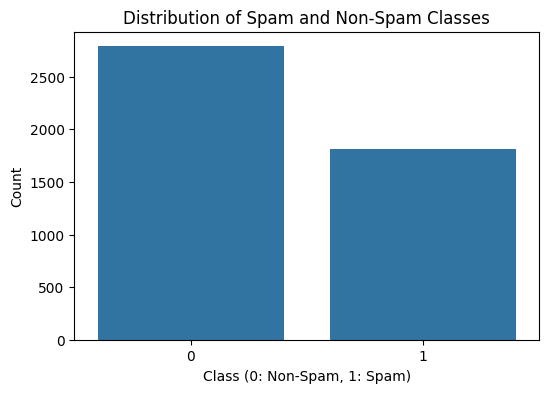

In [8]:
# --- 5. Explore Target Variable Distribution ---
# Penting untuk classification task

# To check how many spam and non-spam emails you have — both in raw count and as a percentage — and to visualize it using a bar chart.

print("\n ----- Distribution of 'label' (target variable): ----- ")
print(y_spambase.value_counts())
print("\n ----- Percentage distribution of 'label': ----- ")
print(y_spambase.value_counts(normalize=True) * 100)  # makes it show percentages instead of counts.

plt.figure(figsize=(6, 4))
sns.countplot(x=y_spambase)
plt.title('Distribution of Spam and Non-Spam Classes')
plt.xlabel('Class (0: Non-Spam, 1: Spam)')
plt.ylabel('Count')
plt.show()

#### 7. Feature Distributions (Histogram)

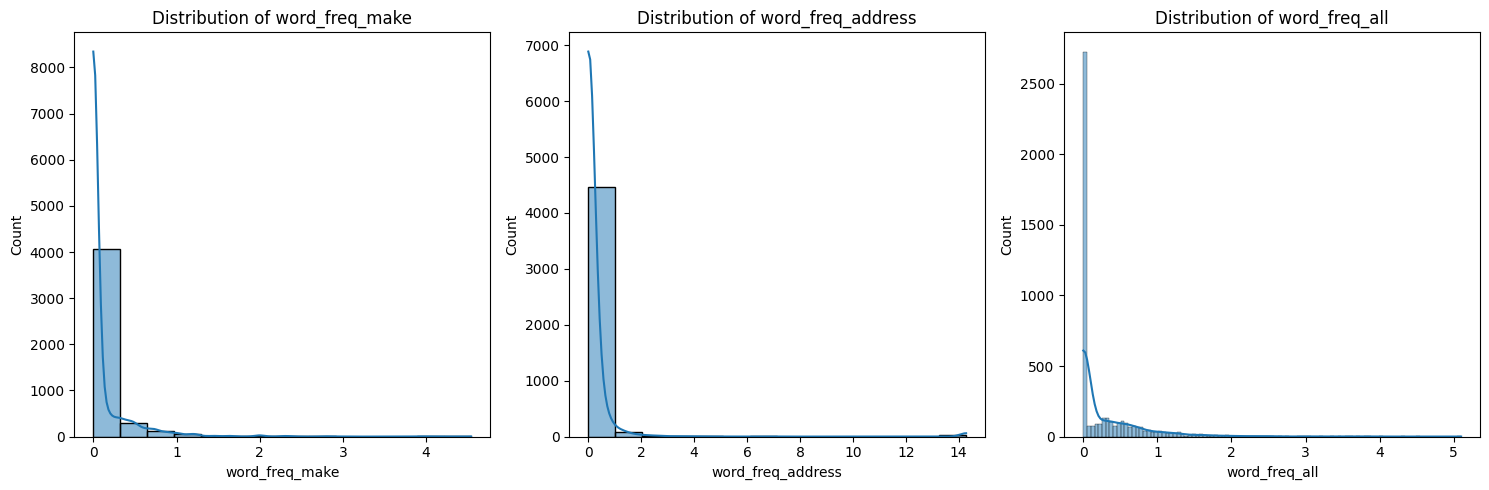

In [9]:
# --- 5. Feature Distributions (Histograms) ---
# Correcting feature names to use the actual ones from spambase_columns.
# Plotting the first 3 features as an example.
# Basically, to plot histograms of the first 3 features in your dataset

features_to_plot = spambase_columns[0:3] # This gets the first 3 feature names from your spambase_columns list

plt.figure(figsize=(15, 5)) # Creates a new figure that is 15 inches wide and 5 inches tall
for i, col_name in enumerate(features_to_plot):
    plt.subplot(1, 3, i + 1) # This sets up 3 subplots in one row
    sns.histplot(X_spambase[col_name], kde=True)
    plt.title(f'Distribution of {col_name}')
plt.tight_layout()
plt.show()

#### 8. Correlation Heatmap

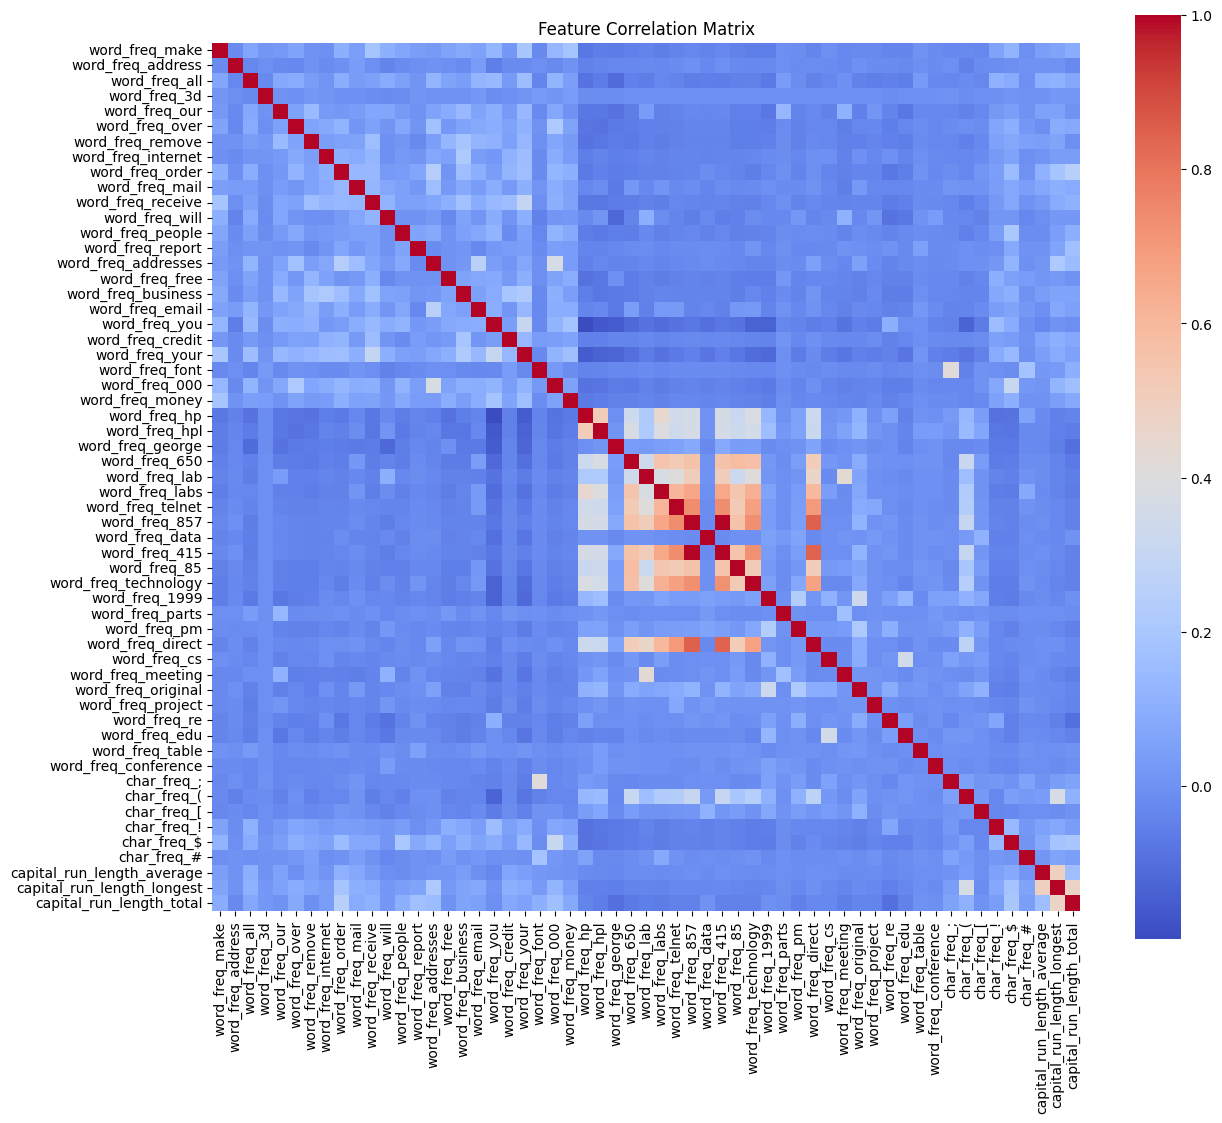

In [10]:
# --- 6. Correlation Heatmap ---
# To show that each feature correlates with every other
# |corr|>0.9 - two features carry nearly identical information

'''
This code is creating a correlation heatmap, which is a visual tool to help 
you see how strongly your features relate to each other — and whether any of them are very similar or redundant.

Each square shows the correlation between a pair of features.
The color tells you how strong the relationship is:
- Bright red = very strong positive correlation (close to +1)
- Bright blue = very strong negative correlation (close to –1)
- White/light = weak/no correlation (close to 0)

Diagonal = 1s, because each feature is perfectly correlated with itself

'''

plt.figure(figsize=(14,12))
# Using X_spambase for correlation of features only 
sns.heatmap(X_spambase.corr(), cmap='coolwarm', square=True, cbar=True, annot=False, fmt=".2f") # Added annot=False for less clutter, cbar=True for scale, y=feat - Shows the values of the selected feature on the y-axis
plt.title("Feature Correlation Matrix")
plt.show()

#### 9. Outlier Detection - Boxplots

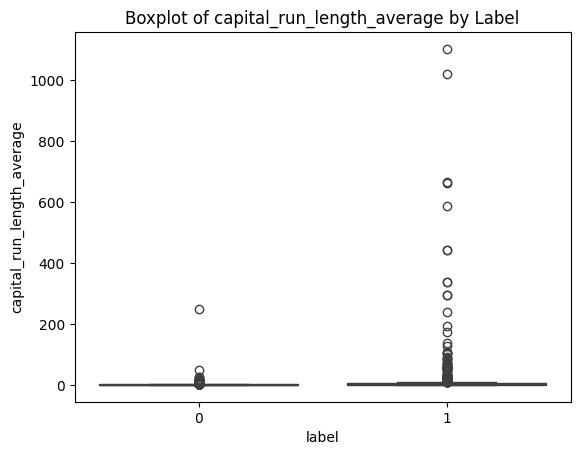

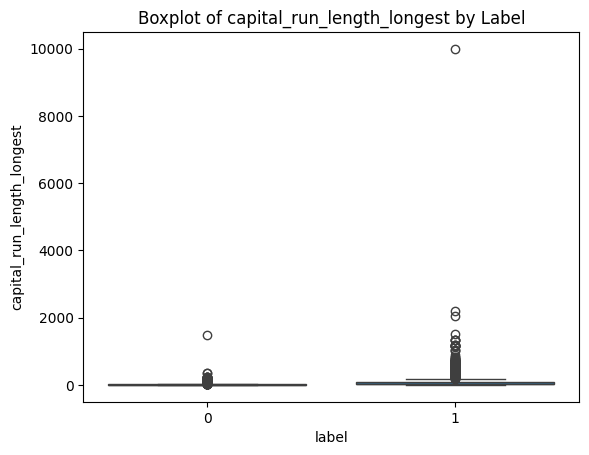

In [11]:
# --- 9. Outlier Detection (Boxplots) ---
# Boxplots for selected features, grouped by class label.
for feat in ['capital_run_length_average','capital_run_length_longest']:
    plt.figure()
    # Using the original df here to easily plot 'label' against features
    sns.boxplot(x='label', y=feat, data=df)
    plt.title(f"Boxplot of {feat} by Label")
    plt.show()

#### 10. Dimensionality Reduction (PCA)

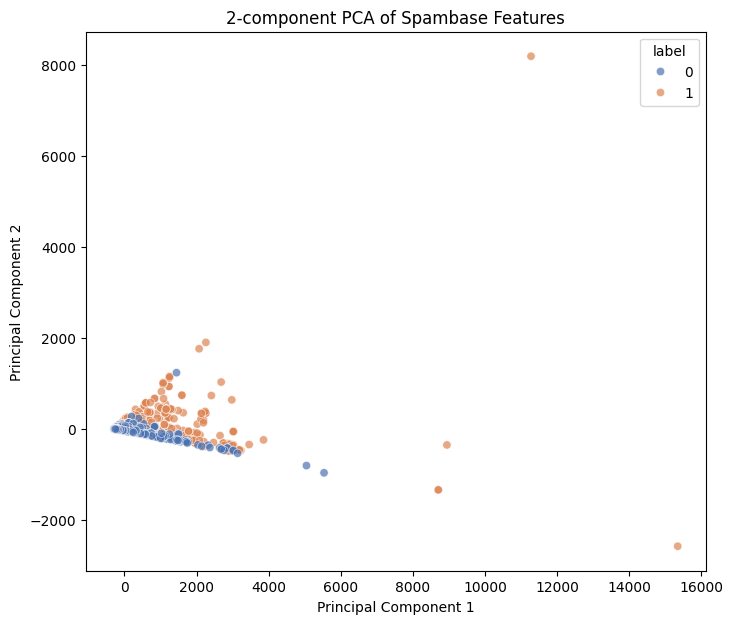

In [12]:
'''
- This block of code creates a scatter plot of your dataset after applying PCA
- it's very helpful for visualizing high-dimensional data (your 57 features) in just 2 dimensions.

'''

pca = PCA(n_components=2) # Renamed the variable to avoid conflict with potential functions name
pca_components = pca.fit_transform(X_spambase)

plt.figure(figsize=(8, 7)) # Adjust figure size for better aspect ratio
sns.scatterplot(x=pca_components[:,0], y=pca_components[:,1], hue=y_spambase, palette='deep', alpha=0.7)

plt.title("2-component PCA of Spambase Features")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

#### 11. Scaling

In [13]:
# To normalize or standardize your features so they all have the same scale 
scaler = StandardScaler()
X_spambase_scaled = scaler.fit_transform(X_spambase)

print("\nShape of scaled features (X_spambase_scaled):")
print(X_spambase_scaled.shape)
print("First 5 rows of scaled features (showing a snippet):")
print(X_spambase_scaled[:5, :5]) # Print first 5 rows and 5 columns of the scaled array


Shape of scaled features (X_spambase_scaled):
(4601, 57)
First 5 rows of scaled features (showing a snippet):
[[-0.34243371  0.3308849   0.71285877 -0.04689958  0.01156471]
 [ 0.3453594   0.05190919  0.43512954 -0.04689958 -0.25611729]
 [-0.14592139 -0.16507191  0.85172339 -0.04689958  1.36484594]
 [-0.34243371 -0.16507191 -0.55676058 -0.04689958  0.4725726 ]
 [-0.34243371 -0.16507191 -0.55676058 -0.04689958  0.4725726 ]]
